<a href="https://colab.research.google.com/github/mattabott/E_commerce_analysis/blob/main/E_commerce_kaggle_2_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook contains data analysis of an e-commerce databse (https://www.kaggle.com/mkechinov/ecommerce-events-history-in-electronics-store)

This database contains behavior data for 5 months (Oct 2019 – Feb 2020) from a large electronics online store.

Each row in the file represents an event. All events are related to products and users. Each event is like many-to-many relation between products and users.

All code is written by me (mattabott@gmail.com)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/events (1).csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44285 entries, 0 to 44284
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   event_time     44285 non-null  object 
 1   event_type     44285 non-null  object 
 2   product_id     44285 non-null  int64  
 3   category_id    44285 non-null  int64  
 4   category_code  31042 non-null  object 
 5   brand          32888 non-null  object 
 6   price          44284 non-null  float64
 7   user_id        44284 non-null  float64
 8   user_session   44275 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 3.0+ MB


In [6]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1.515916e+18,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1.515916e+18,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1.515916e+18,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1.515916e+18,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1.515916e+18,aa4mmk0kwQ


In [7]:
df = df.astype({'user_id': str, 'product_id': str})

Deleting 'category_id' because I'll use 'category_code'.

In [8]:
df = df.drop(columns='category_id')

In [9]:
df['event_time'] = pd.to_datetime(df['event_time'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44285 entries, 0 to 44284
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   event_time     44285 non-null  datetime64[ns, UTC]
 1   event_type     44285 non-null  object             
 2   product_id     44285 non-null  object             
 3   category_code  31042 non-null  object             
 4   brand          32888 non-null  object             
 5   price          44284 non-null  float64            
 6   user_id        44285 non-null  object             
 7   user_session   44275 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), object(6)
memory usage: 2.7+ MB


The currency is not defined in data information, so I'll not use it.

In [11]:
df_cart = df[df['event_type']=='purchase']
print('Total earned:',df_cart.price.sum())

Total earned: 163202.3


In [12]:
view = df[df['event_type']=='view'].event_type.count()
cart = df[df['event_type']=='cart'].event_type.count()
purch = df[df['event_type']=='purchase'].event_type.count()
remove = df[df['event_type']=='remove_from_cart'].event_type.count()
print(view, 'products viewed.')
print(cart, 'products added to cart.')
print(purch, 'products purchased.')
print(remove, 'products removed from cart.')

40359 products viewed.
2310 products added to cart.
1616 products purchased.
0 products removed from cart.


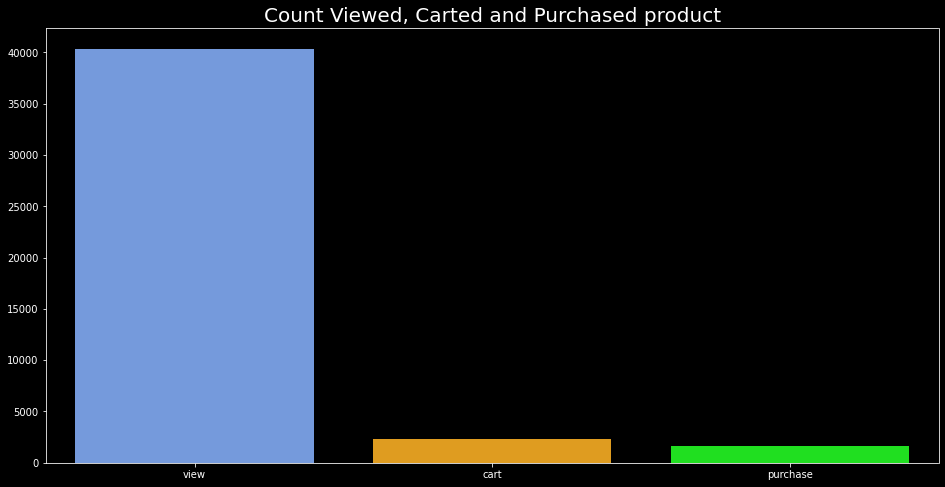

In [15]:
xlist = ['view', 'cart', 'purchase']
ylist = [view, cart, purch]
colors = ['cornflowerblue', 'orange', 'lime']

plt.figure(figsize=(16,8))
plt.title('Count Viewed, Carted and Purchased product', fontsize=20)

sns.barplot(x=xlist, y=ylist, palette=colors)

plt.show()

In [16]:
perc_cart = cart/view * 100
perc_purch = purch/view * 100
perc_purch_cart = purch/cart *100

print('The', '%.2f'%perc_cart, '% of viewed products was in the cart.')
print('The', '%.2f'%perc_purch, '% of viewed products was purchased.')
print('The', '%.2f'%perc_purch_cart, '% of products in the cart was purchased.')

The 5.72 % of viewed products was in the cart.
The 4.00 % of viewed products was purchased.
The 69.96 % of products in the cart was purchased.


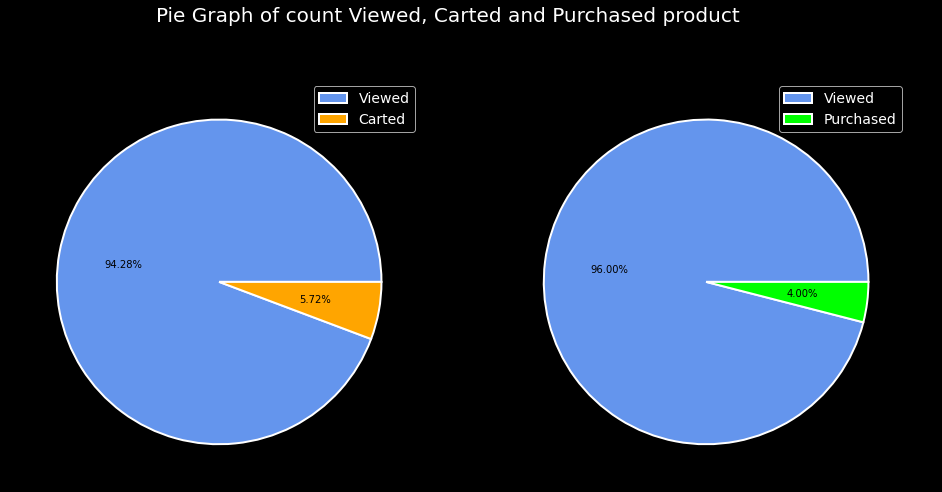

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
#fig.figure(figsize=(16,8))

fig.suptitle('Pie Graph of count Viewed, Carted and Purchased product', fontsize=20)
name=['Viewed', 'Carted']
tot= view-cart
name2=['Viewed', 'Purchased']
tot2= view-purch

ax1.pie([tot,cart], labels=name, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },autopct='%.2f%%', colors=['cornflowerblue','orange'], textprops={'color':"black"})
ax2.pie([tot2,purch], labels=name2, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },autopct='%.2f%%', colors=['cornflowerblue', 'lime'], textprops={'color':"black"})

ax1.legend(fontsize=14)
ax2.legend(fontsize=14)
plt.show()

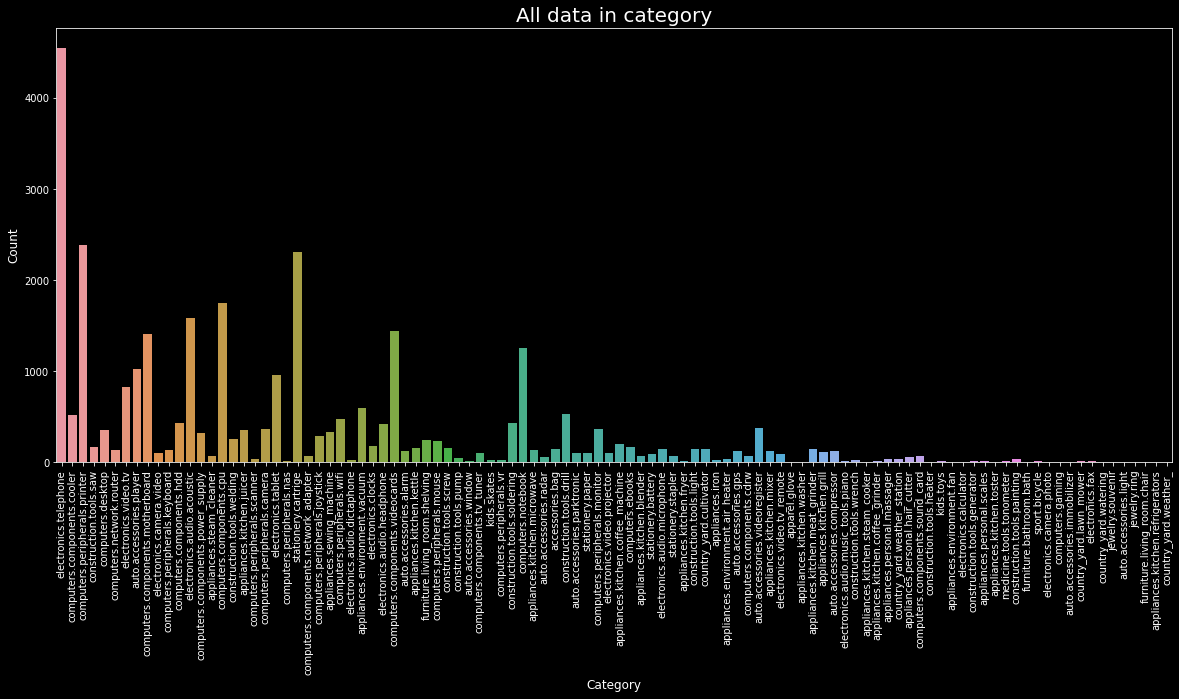

In [53]:
plt.figure(figsize=(20,8))
plt.title('All data in category', fontsize=20)
sns.countplot(x='category_code', data=df)
plt.xticks(rotation=90)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [19]:
#divide time in day subdivide
df = df.assign(session=pd.cut(df.event_time.dt.hour, 
                              [0,6,12,18,23],
                              labels=['Night', 'Morning', 'Afternoon', 'Evening'],
                              include_lowest=True))


In [20]:
viewed = df[df['event_type']=='view']
carted = df[df['event_type']=='cart']
purchased = df[df['event_type']=='purchase']

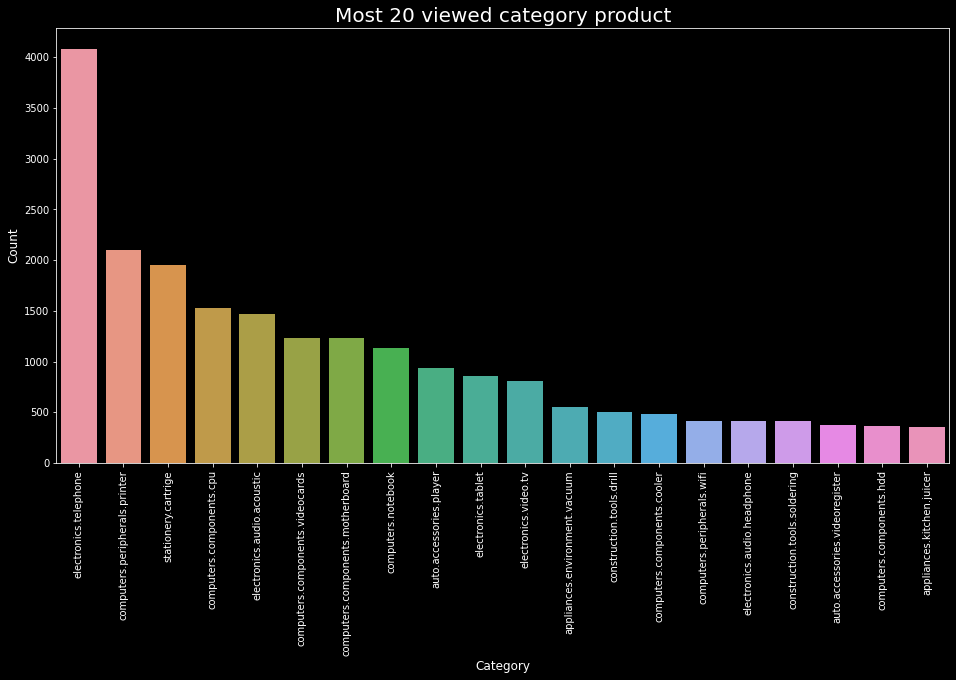

In [54]:
plt.figure(figsize=(16,8))
plt.title('Most 20 viewed category product', fontsize=20)
sns.countplot(x='category_code', data=viewed, order=viewed['category_code'].value_counts().index[:20])
plt.xticks(rotation=90)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

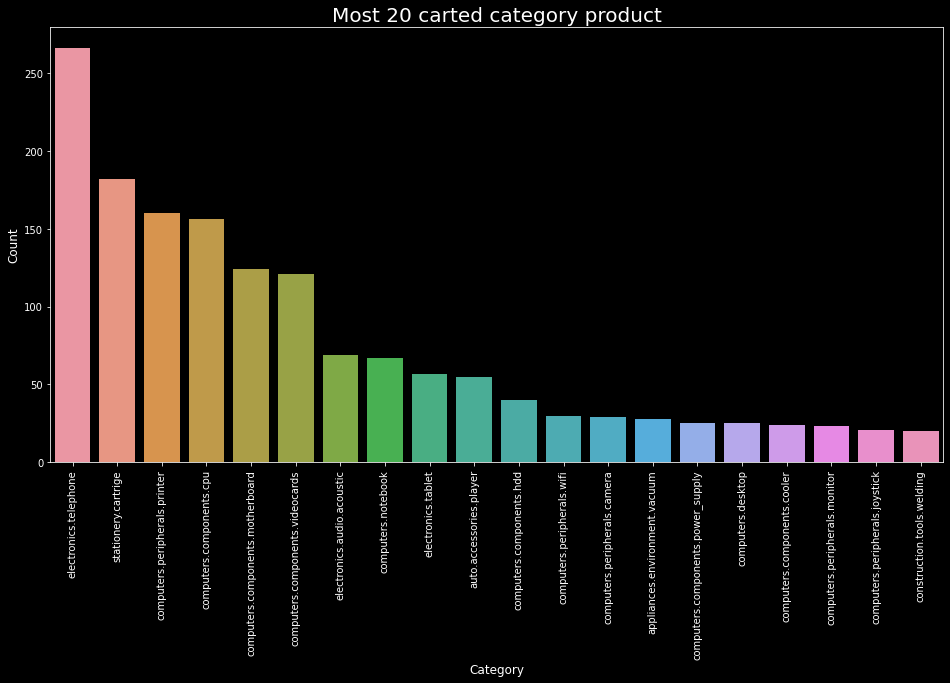

In [55]:
plt.figure(figsize=(16,8))
plt.title('Most 20 carted category product', fontsize=20)
sns.countplot(x='category_code', data=carted, order=carted['category_code'].value_counts().index[:20])
plt.xticks(rotation=90)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

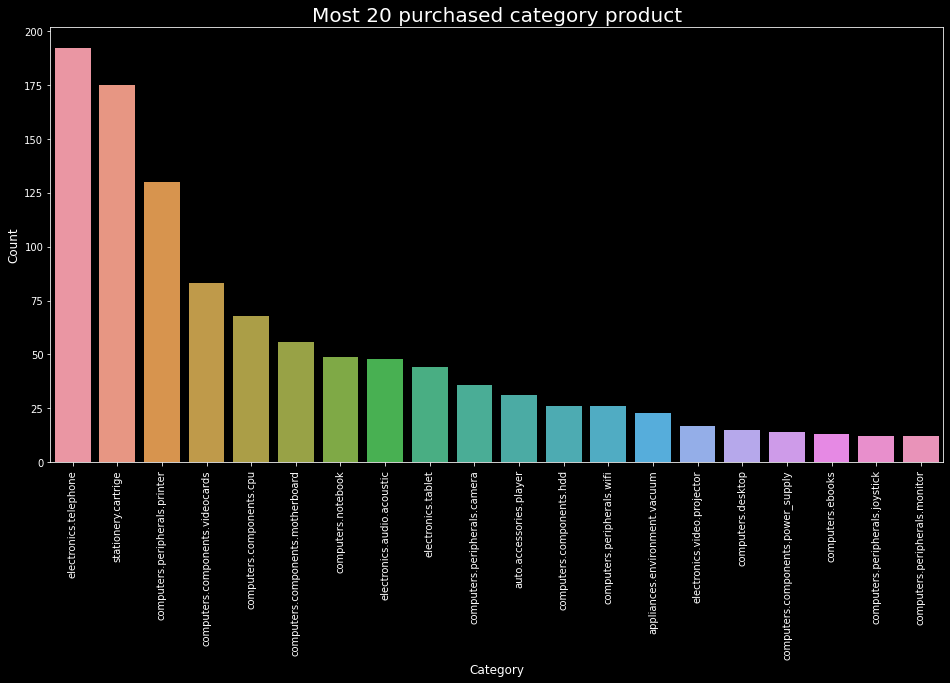

In [56]:
plt.figure(figsize=(16,8))
plt.title('Most 20 purchased category product', fontsize=20)
sns.countplot(x='category_code', data=purchased, order=purchased['category_code'].value_counts().index[:20])
plt.xticks(rotation=90)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


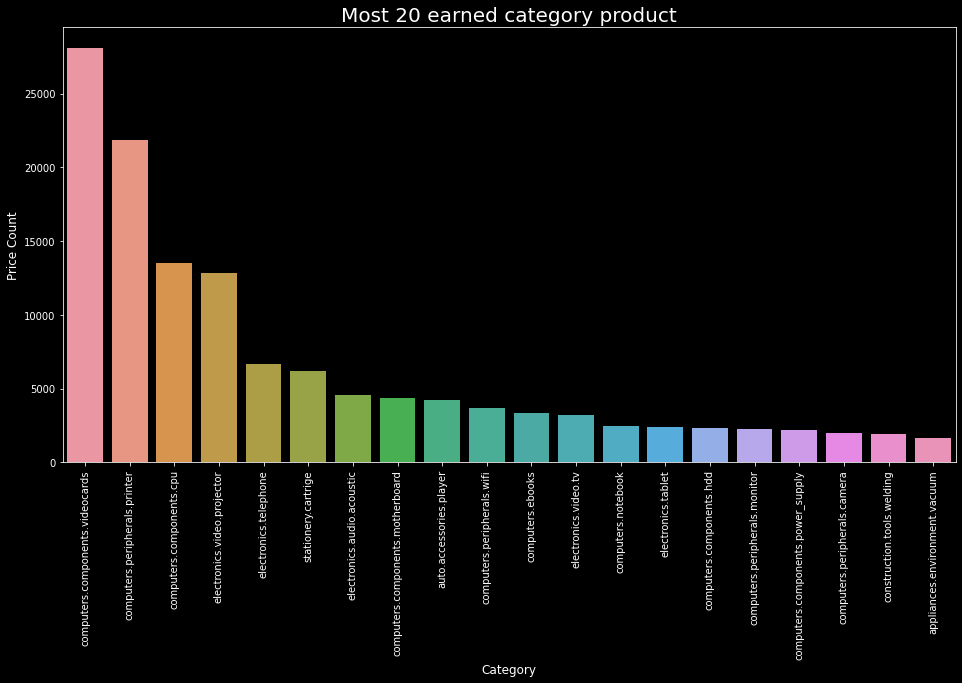

In [57]:
purch_sum = purchased.groupby('category_code')['category_code','price'].sum().sort_values('price', ascending=False)

plt.figure(figsize=(16,8))
plt.title('Most 20 earned category product', fontsize=20)
sns.barplot(x=purch_sum.index,y='price', data=purch_sum, order=purch_sum.index[:20])
plt.xticks(rotation=90)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Price Count', fontsize=12)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


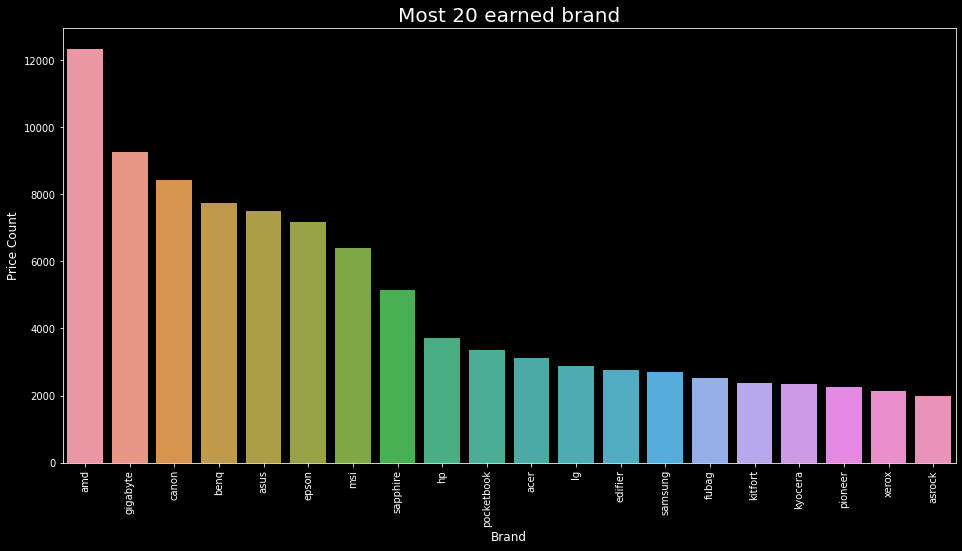

In [58]:
brand_purch = purchased.groupby('brand')['brand','price'].sum().sort_values('price', ascending=False)

plt.figure(figsize=(16,8))
plt.title('Most 20 earned brand', fontsize=20)
sns.barplot(x=brand_purch.index,y='price', data=brand_purch, order=brand_purch.index[:20])
plt.xticks(rotation=90)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Price Count', fontsize=12)
plt.show()

Let's see connections between category carted products anc viewed.
See the first 20 most carted abd purchased to have a clear vision of connections.

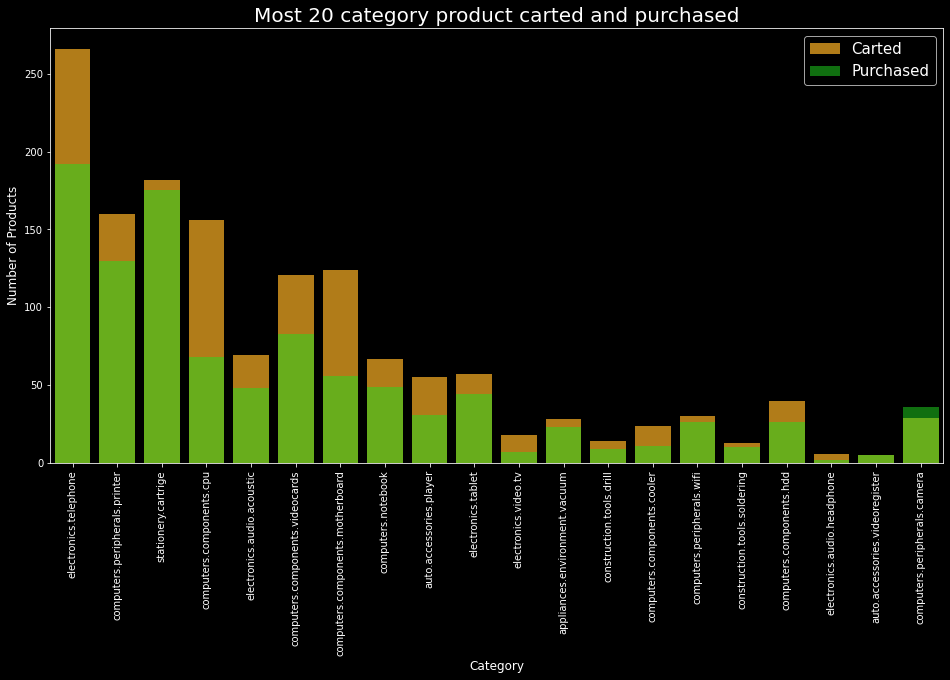

In [26]:
plt.figure(figsize=(16,8))
plt.title('Most 20 category product carted and purchased', fontsize=20)

sns.countplot(x='category_code', data=carted, order=df['category_code'].value_counts().index[:20], alpha=0.8, color='orange', label='Carted')

sns.countplot(x='category_code', data=purchased, order=df['category_code'].value_counts().index[:20],alpha=0.5, color='lime', label='Purchased')

plt.legend(fontsize=15)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.xticks(rotation=90)
plt.show()

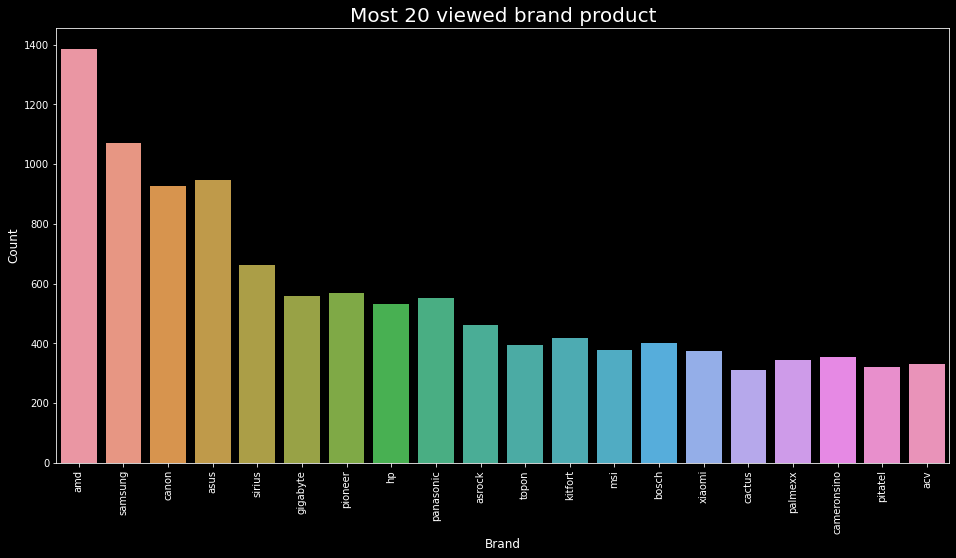

In [59]:
plt.figure(figsize=(16,8))
plt.title('Most 20 viewed brand product', fontsize=20)
sns.countplot(x='brand', data=viewed, order=df['brand'].value_counts().index[:20])
plt.xticks(rotation=90)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

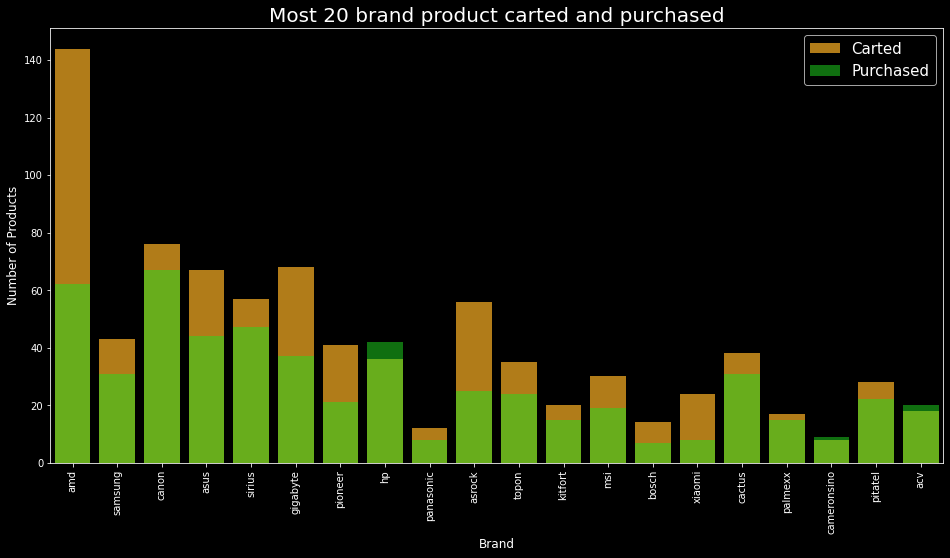

In [28]:
plt.figure(figsize=(16,8))
plt.title('Most 20 brand product carted and purchased', fontsize=20)

sns.countplot(x='brand', data=carted, order=df['brand'].value_counts().index[:20], alpha=0.8, color='orange', label='Carted')

sns.countplot(x='brand', data=purchased, order=df['brand'].value_counts().index[:20],alpha=0.5, color='lime', label='Purchased')

plt.legend(fontsize=15)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [29]:
df_mod = df.copy()

df_mod['view'] = np.where(df_mod['event_type']=='view', 1,0)
df_mod['cart'] = np.where(df_mod['event_type']=='cart', 2,0)
df_mod['purchase'] = np.where(df_mod['event_type']=='purchase', 3,0)

df_mod.head()

,event_time,event_type,product_id,category_code,brand,price,user_id,user_session,session,view,cart,purchase
0,2020-09-24 11:57:06+00:00,view,1996170,electronics.telephone,NaN,31.90,1.5159156255193882e+18,LJuJVLEjPT,Morning,1,0,0
1,2020-09-24 11:57:26+00:00,view,139905,computers.components.cooler,zalman,17.16,1.5159156255193805e+18,tdicluNnRY,Morning,1,0,0
2,2020-09-24 11:57:27+00:00,view,215454,NaN,NaN,9.81,1.5159156255132385e+18,4TMArHtXQy,Morning,1,0,0
3,2020-09-24 11:57:33+00:00,view,635807,computers.peripherals.printer,pantum,113.81,1.5159156255190144e+18,aGFYrNgC08,Morning,1,0,0
4,2020-09-24 11:57:36+00:00,view,3658723,NaN,cameronsino,15.87,1.5159156255107433e+18,aa4mmk0kwQ,Morning,1,0,0


To have a better visualisation I change values in 'event_type'.

'view' is changed to 1 if True and 0 if False. 
'cart' to 2, 'purchase' to 3 if they are True, 0 if False.

Doing so we can visualize a better graphic.

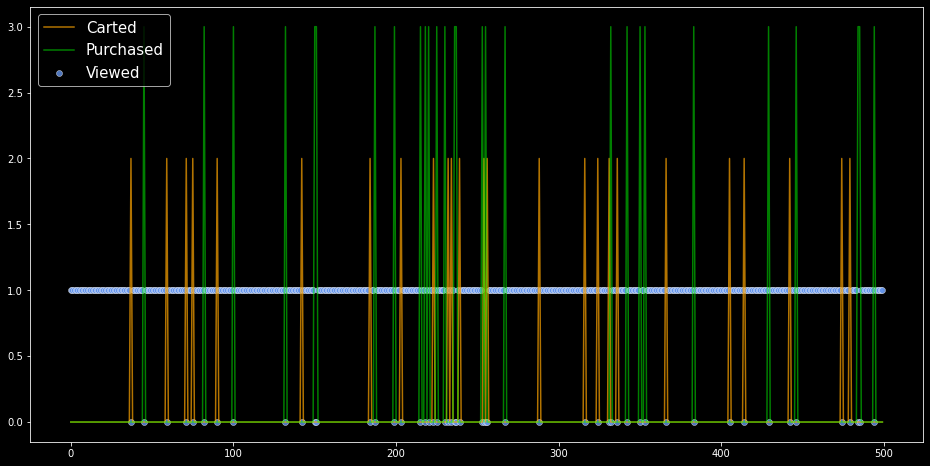

In [60]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=df_mod.index[:500], y='view', data=df_mod[:500], alpha=0.8, color='cornflowerblue', label='Viewed')
sns.lineplot(x=df_mod.index[:500], y='cart', data=df_mod[:500], alpha=0.7, color='orange', label='Carted')
sns.lineplot(x=df_mod.index[:500], y='purchase', data=df_mod[:500], alpha=0.5, color='lime', label='Purchased')

plt.legend(fontsize=15)
plt.ylabel('', fontsize=12)

plt.show()

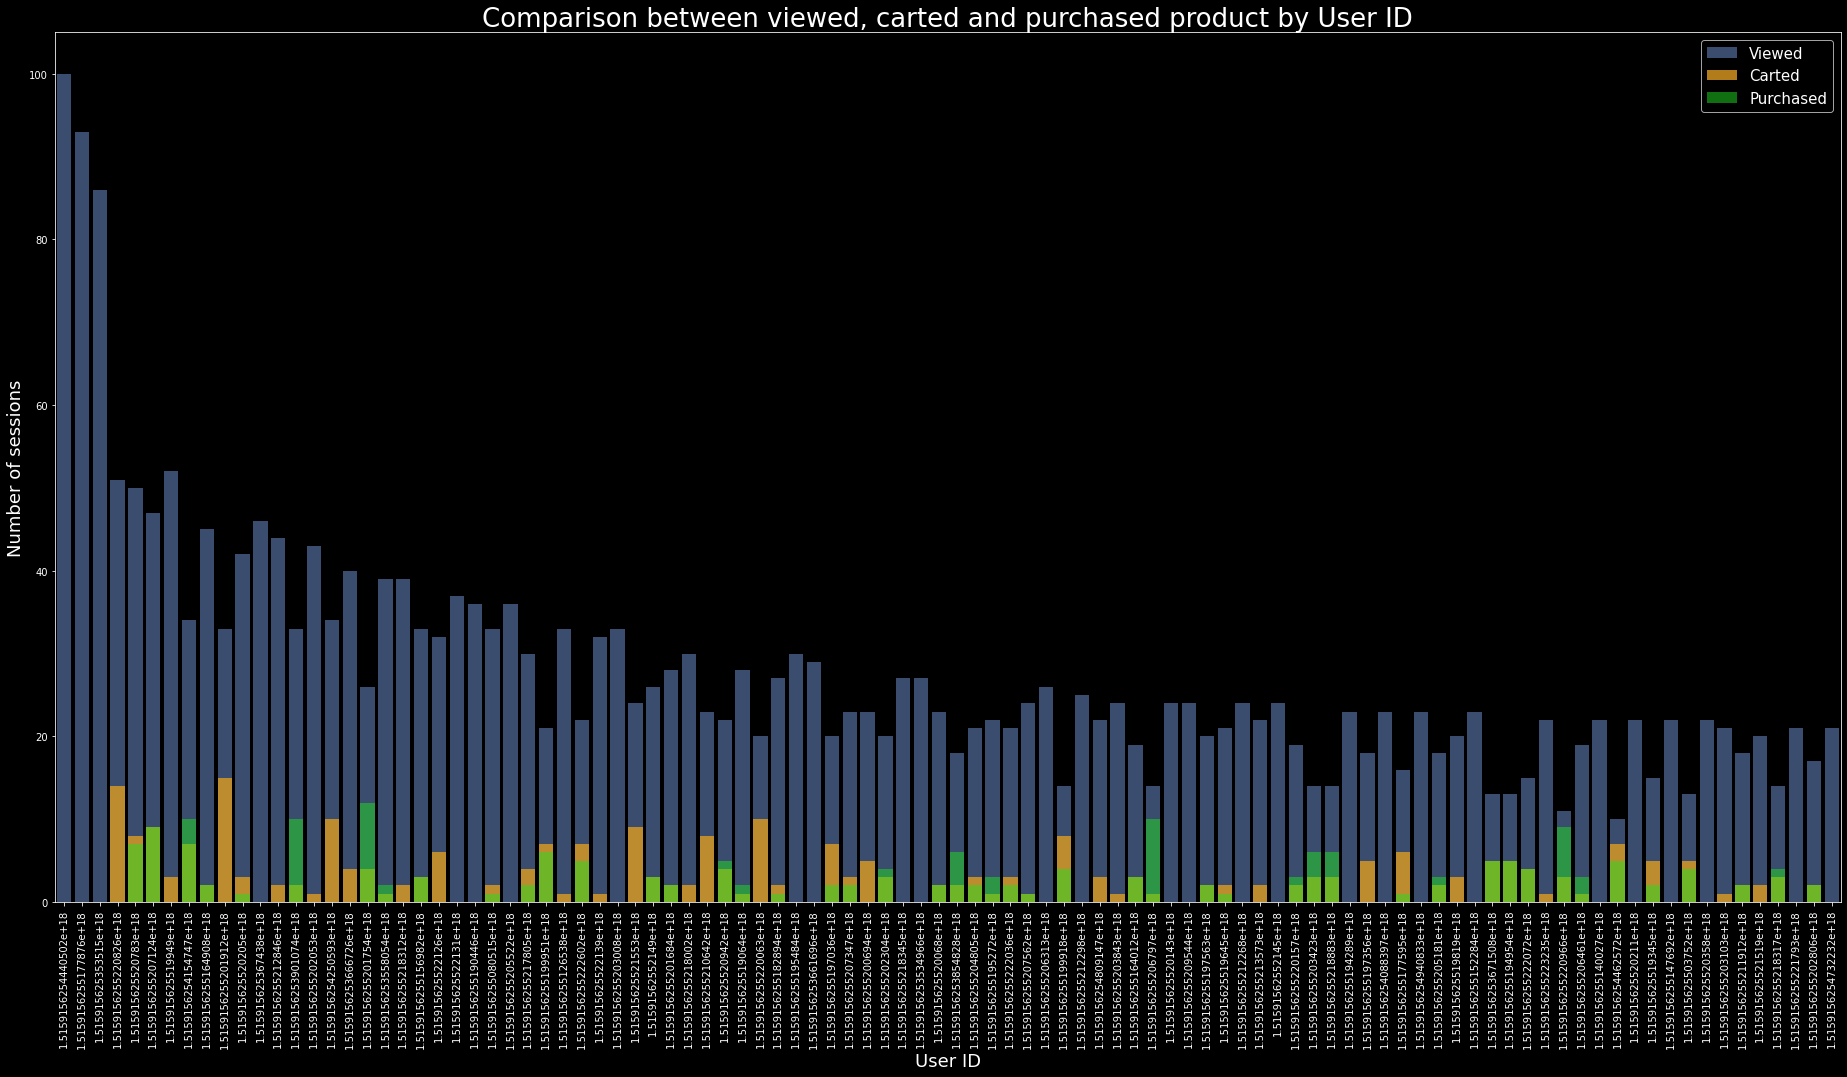

In [31]:
plt.figure(figsize=(32,16))
plt.title('Comparison between viewed, carted and purchased product by User ID', fontsize=26)

sns.countplot(x='user_id', data=viewed, order=df['user_id'].value_counts().index[:100], color='cornflowerblue',alpha=0.5, label='Viewed')

sns.countplot(x='user_id', data=carted, order=df['user_id'].value_counts().index[:100], color='orange',alpha=0.8, label='Carted')

sns.countplot(x='user_id', data=purchased, order=df['user_id'].value_counts().index[:100], color='lime',alpha=0.5, label='Purchased')

plt.legend(fontsize=15, loc=1)
plt.xlabel('User ID', fontsize=18)
plt.ylabel('Number of sessions', fontsize=18)
plt.xticks(rotation=90)

plt.show()

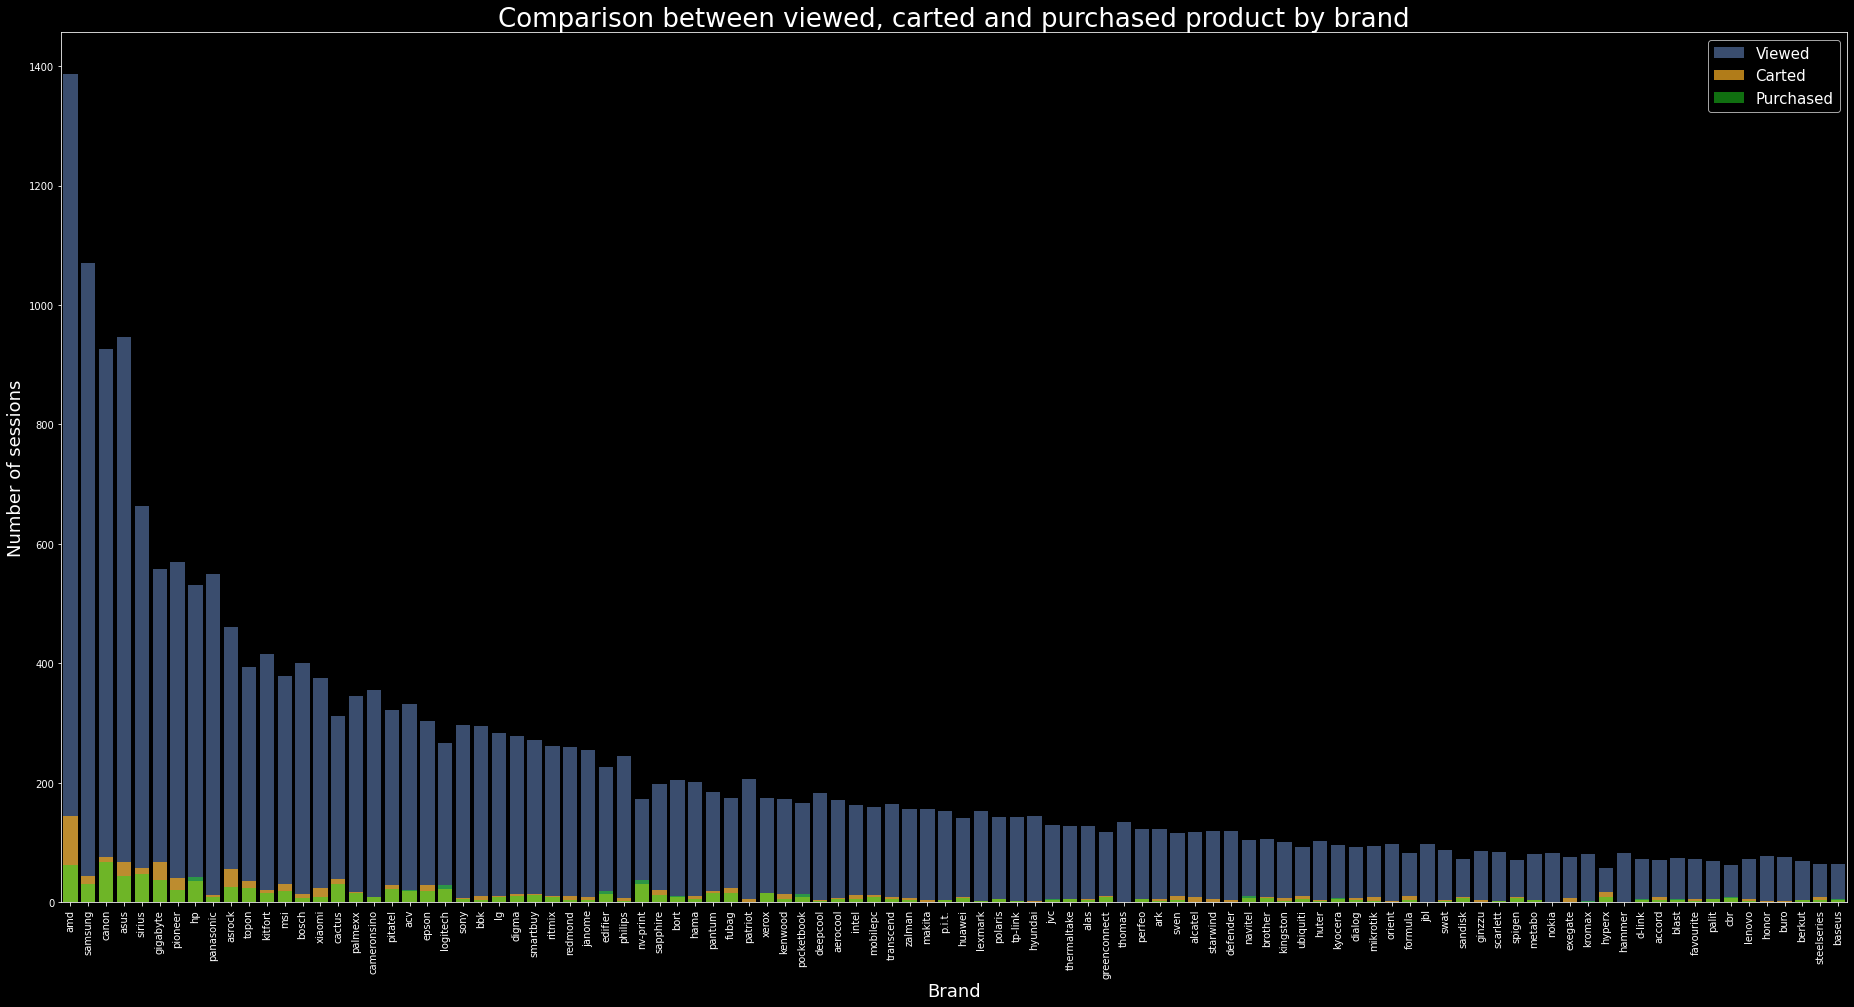

In [32]:
plt.figure(figsize=(32,16))
plt.title('Comparison between viewed, carted and purchased product by brand', fontsize=26)

sns.countplot(x='brand', data=viewed, order=df['brand'].value_counts().index[:100], color='cornflowerblue',alpha=0.5, label='Viewed')

sns.countplot(x='brand', data=carted, order=df['brand'].value_counts().index[:100], color='orange',alpha=0.8, label='Carted')

sns.countplot(x='brand', data=purchased, order=df['brand'].value_counts().index[:100], color='lime',alpha=0.5, label='Purchased')

plt.legend(fontsize=15, loc=1)
plt.xlabel('Brand', fontsize=18)
plt.ylabel('Number of sessions', fontsize=18)
plt.xticks(rotation=90)

plt.show()

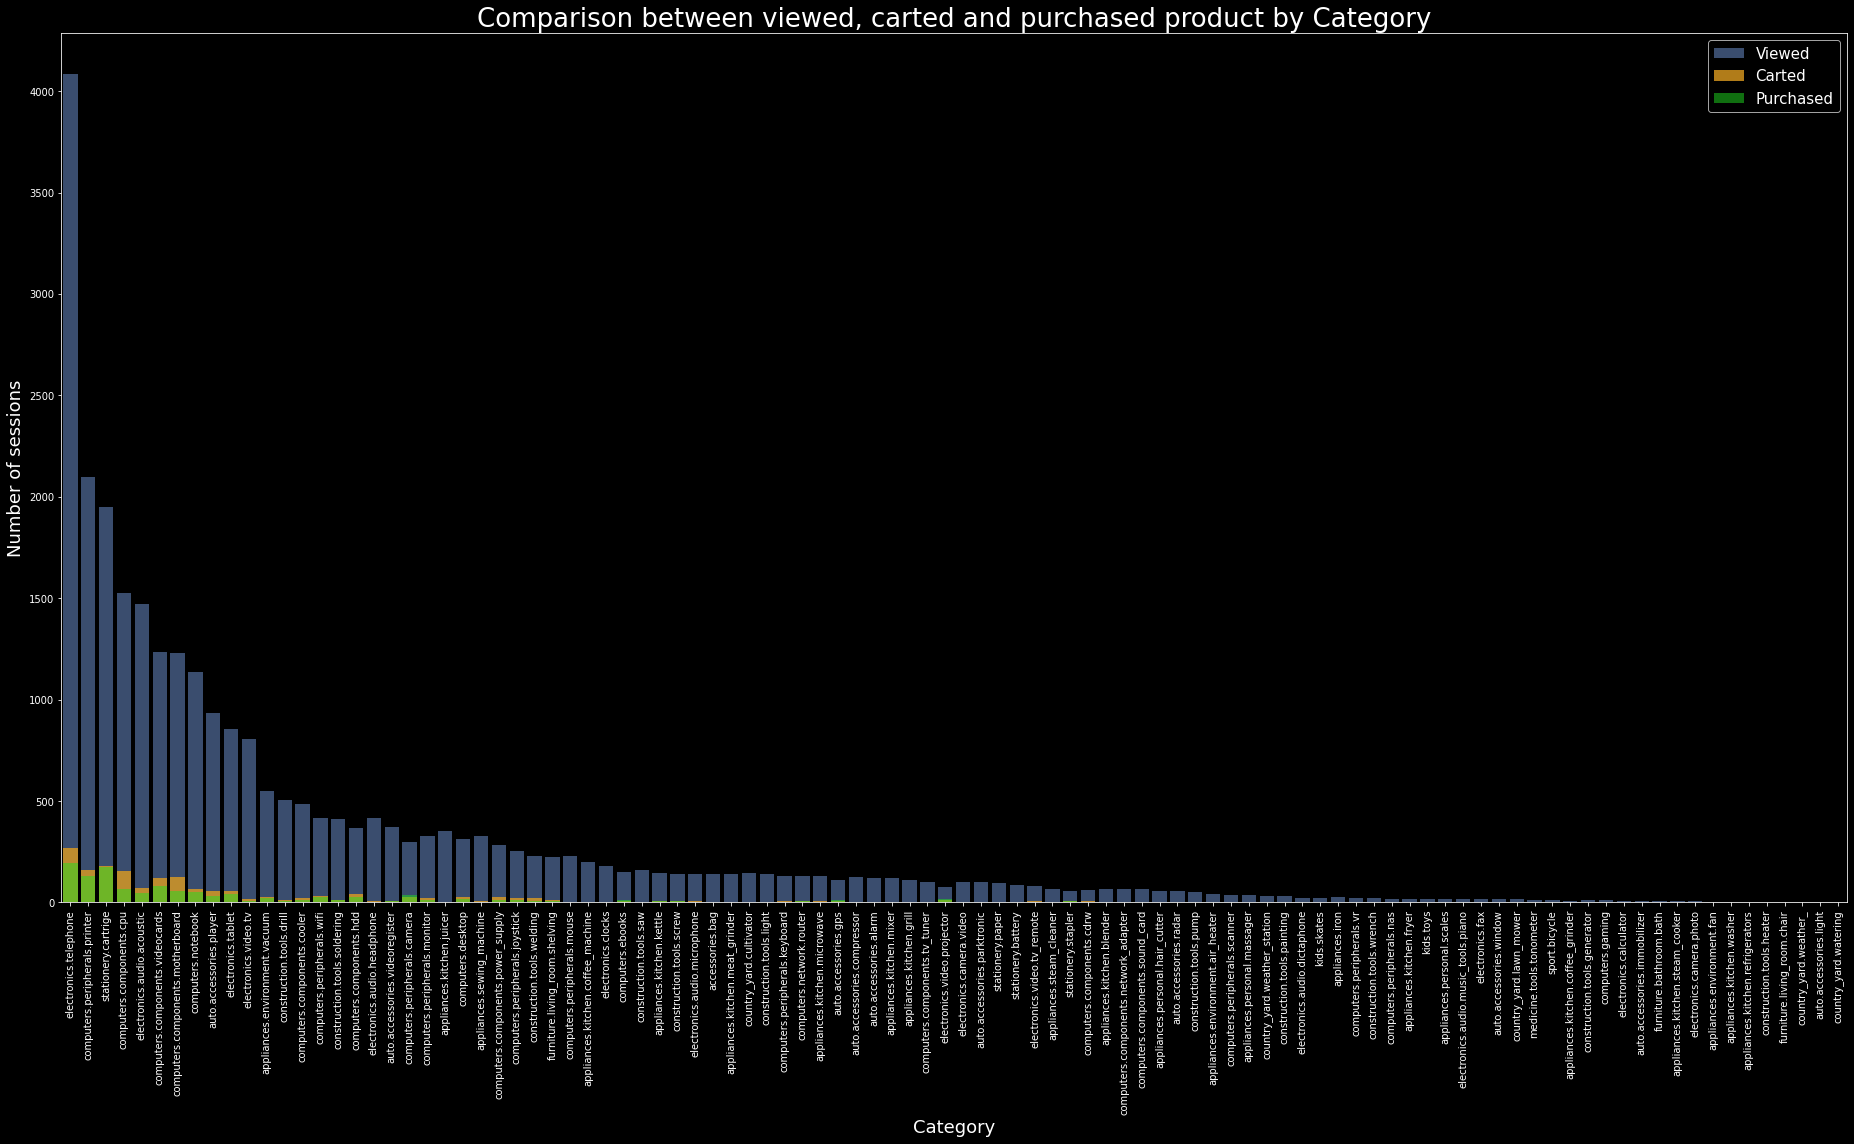

In [33]:
plt.figure(figsize=(32,16))
plt.title('Comparison between viewed, carted and purchased product by Category', fontsize=26)

sns.countplot(x='category_code', data=viewed, order=df['category_code'].value_counts().index[:100], color='cornflowerblue',alpha=0.5, label='Viewed')

sns.countplot(x='category_code', data=carted, order=df['category_code'].value_counts().index[:100], color='orange',alpha=0.8, label='Carted')

sns.countplot(x='category_code', data=purchased, order=df['category_code'].value_counts().index[:100], color='lime',alpha=0.5, label='Purchased')

plt.legend(fontsize=15, loc=1)
plt.xlabel('Category', fontsize=18)
plt.ylabel('Number of sessions', fontsize=18)
plt.xticks(rotation=90)

plt.show()

In [34]:
df.head()

,event_time,event_type,product_id,category_code,brand,price,user_id,user_session,session
0,2020-09-24 11:57:06+00:00,view,1996170,electronics.telephone,NaN,31.90,1.5159156255193882e+18,LJuJVLEjPT,Morning
1,2020-09-24 11:57:26+00:00,view,139905,computers.components.cooler,zalman,17.16,1.5159156255193805e+18,tdicluNnRY,Morning
2,2020-09-24 11:57:27+00:00,view,215454,NaN,NaN,9.81,1.5159156255132385e+18,4TMArHtXQy,Morning
3,2020-09-24 11:57:33+00:00,view,635807,computers.peripherals.printer,pantum,113.81,1.5159156255190144e+18,aGFYrNgC08,Morning
4,2020-09-24 11:57:36+00:00,view,3658723,NaN,cameronsino,15.87,1.5159156255107433e+18,aa4mmk0kwQ,Morning


In [35]:
morning = df[df['session']=='Morning'].session.count()
afternoon = df[df['session']=='Afternoon'].session.count()
evening = df[df['session']=='Evening'].session.count()
night = df[df['session']=='Night'].session.count()

morning_v = viewed[viewed['session']=='Morning'].session.count()
afternoon_v = viewed[viewed['session']=='Afternoon'].session.count()
evening_v = viewed[viewed['session']=='Evening'].session.count()
night_v = viewed[viewed['session']=='Night'].session.count()

morning_c = carted[carted['session']=='Morning'].session.count()
afternoon_c = carted[carted['session']=='Afternoon'].session.count()
evening_c = carted[carted['session']=='Evening'].session.count()
night_c = carted[carted['session']=='Night'].session.count()

morning_p = purchased[purchased['session']=='Morning'].session.count()
afternoon_p = purchased[purchased['session']=='Afternoon'].session.count()
evening_p = purchased[purchased['session']=='Evening'].session.count()
night_p = purchased[purchased['session']=='Night'].session.count()

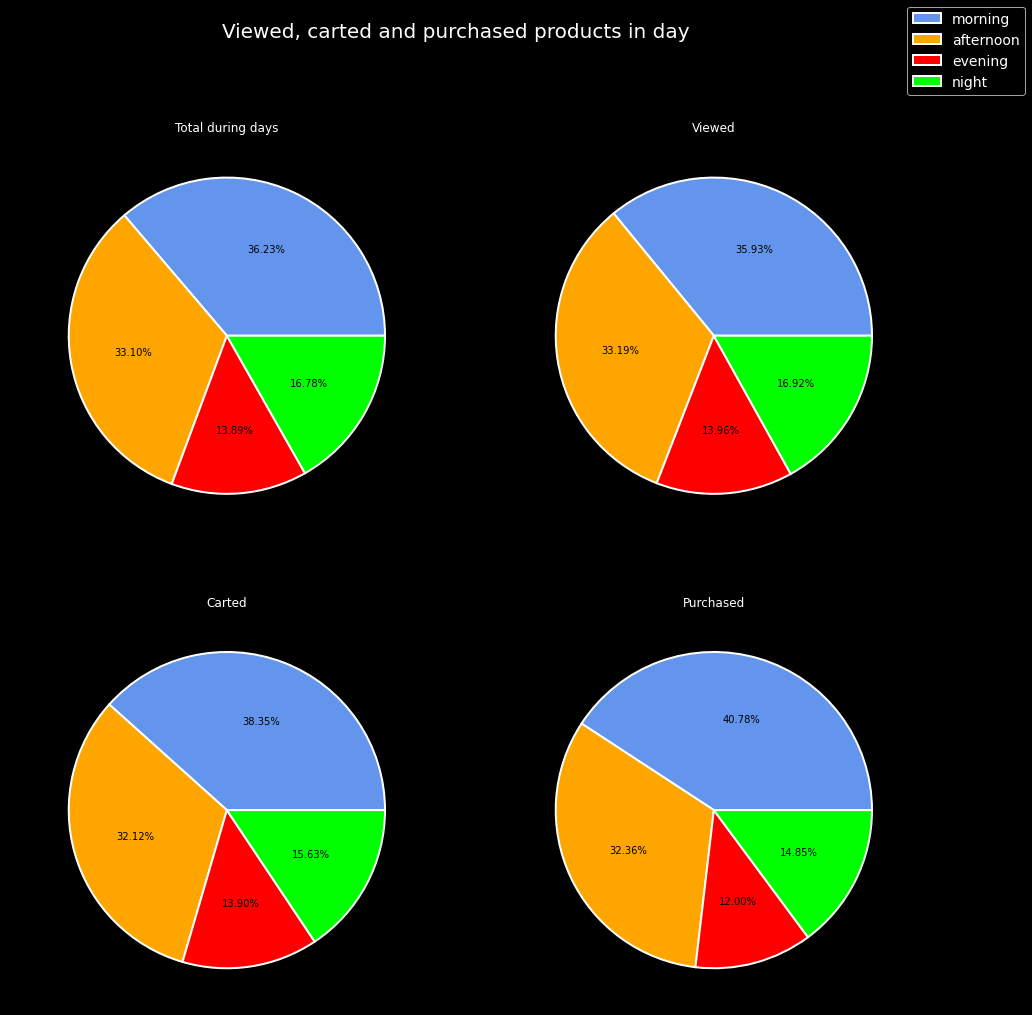

In [36]:
fig = plt.figure(figsize=(16,16))

fig.suptitle('Viewed, carted and purchased products in day', fontsize=20)
name=['morning', 'afternoon', 'evening', 'night']

ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

ax1.title.set_text('Total during days')
ax2.title.set_text('Viewed')
ax3.title.set_text('Carted')
ax4.title.set_text('Purchased')

ax1.pie([morning, afternoon, evening, night], labels=name, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },autopct='%.2f%%', colors=['cornflowerblue','orange', 'red', 'lime'], textprops={'color':"black"})
ax2.pie([morning_v, afternoon_v, evening_v, night_v], wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },autopct='%.2f%%', colors=['cornflowerblue','orange', 'red', 'lime'], textprops={'color':"black"})
ax3.pie([morning_c, afternoon_c, evening_c, night_c], wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },autopct='%.2f%%', colors=['cornflowerblue','orange', 'red', 'lime'], textprops={'color':"black"})
ax4.pie([morning_p, afternoon_p, evening_p, night_p], wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },autopct='%.2f%%', colors=['cornflowerblue','orange', 'red', 'lime'], textprops={'color':"black"})

fig.legend(fontsize=14)

plt.show()

In [37]:
view_perc = [morning_v, afternoon_v, evening_v, night_v]
cart_perc = [morning_c, afternoon_c, evening_c, night_c]
purch_perc = [morning_p, afternoon_p, evening_p, night_p]

def tot_perc(data, action):
  tot = 0
  perc = []
  day = ['morning', 'afternoon', 'evening', 'night']
  for i in data:
    tot = tot+i
  
  for i in data:
    perc.append(round(i / tot * 100,2))
  
  for i, d in zip(perc, day):

    print('The', i, '% of products was', action, 'in the', d)
  print('\n')

tot_perc(view_perc, 'viewed')
tot_perc(cart_perc, 'carted')
tot_perc(purch_perc, 'purchased')



#print(perc_view)

The 35.93 % of products was viewed in the morning
The 33.19 % of products was viewed in the afternoon
The 13.96 % of products was viewed in the evening
The 16.92 % of products was viewed in the night


The 38.35 % of products was carted in the morning
The 32.12 % of products was carted in the afternoon
The 13.9 % of products was carted in the evening
The 15.63 % of products was carted in the night


The 40.78 % of products was purchased in the morning
The 32.36 % of products was purchased in the afternoon
The 12.0 % of products was purchased in the evening
The 14.85 % of products was purchased in the night


